## **Primeiro precisamos de importar algumas librarias**

In [1]:
import pandas as pd #Para manipular o dataset
import numpy as np # Para calcular mean e deviation
import matplotlib.pyplot as plt # Para fazer os grafios
from sklearn.tree import DecisionTreeClassifier # Para construir uma decisiontree
from sklearn.tree import plot_tree # Para desenhar a classification tree
from sklearn.model_selection import cross_val_score # Para cross validation
from sklearn.metrics import confusion_matrix # Para gerar a confusion matrix
from sklearn.metrics import plot_confusion_matrix # Para desenhar a confusion matrix

## **Importar o dataset**

In [2]:
training_data = pd.read_csv("../Dataset/training_data.csv", encoding='latin-1') 
test_data = pd.read_csv("../Dataset/test_data.csv", encoding='latin-1')

## **Agora vamos analisar o dataset**

In [3]:
training_data.head() # Mostrar as primeiras 5 linhas

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


## **Agora vamos ver missing data**

In [4]:
training_data.dtypes #Vamos ver que tipo de data esta em cada coluna

city_name                   object
record_date                 object
AVERAGE_SPEED_DIFF          object
AVERAGE_FREE_FLOW_SPEED    float64
AVERAGE_TIME_DIFF          float64
AVERAGE_FREE_FLOW_TIME     float64
LUMINOSITY                  object
AVERAGE_TEMPERATURE        float64
AVERAGE_ATMOSP_PRESSURE    float64
AVERAGE_HUMIDITY           float64
AVERAGE_WIND_SPEED         float64
AVERAGE_CLOUDINESS          object
AVERAGE_PRECIPITATION      float64
AVERAGE_RAIN                object
dtype: object

In [5]:
training_data.info() # Ver se existe missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [6]:
training_data['city_name'].unique() # Ver que valores estão em city name

array(['Porto'], dtype=object)

In [7]:
#Como só existe Porto podemos ignorar esta coluna
training_data = training_data.drop(['city_name'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)

In [8]:
training_data['AVERAGE_PRECIPITATION'].unique() # Ver que valores estão em AVERAGE_PRECIPITATION

array([0.])

In [9]:
#Como é sempre 0 tambem podemos ignorar esta coluna
training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)
test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

In [10]:
training_data['AVERAGE_CLOUDINESS'].unique() # Ver que valores estão em city name

array([nan, 'céu claro', 'nuvens dispersas', 'céu pouco nublado',
       'céu limpo', 'algumas nuvens', 'nuvens quebrados', 'tempo nublado',
       'nuvens quebradas', 'nublado'], dtype=object)

In [11]:
#Quantos nan existem nesta coluna?
len(training_data.loc[(training_data['AVERAGE_CLOUDINESS'].isna())]) #Existem 2682 rows sem valor, apróximadamente 39.4%

2682

Vamos tratar de agrupar os valores e converter para valores entre 0-1

nan

céu claro 
ceu limpo

nuvens dispersas
algumas nuvens
ceu pouco nublado
nuvens quebrados
nuvens qubradas

nublado
tempo nublado

Ceu limpo vai ser 0
Um pouco nublado 0.5
nublado 1


In [12]:
training_data.replace(to_replace ="céu claro", 
                 value = 'limpo', 
                  inplace = True)

training_data.replace(to_replace ="céu limpo", 
                 value = 'limpo', 
                  inplace = True)

training_data.replace(to_replace ="nuvens dispersas", 
                 value = 'pouco_nublado', 
                  inplace = True)


training_data.replace(to_replace ="algumas nuvens", 
                 value = 'pouco_nublado', 
                  inplace = True)

training_data.replace(to_replace ="céu pouco nublado", 
                 value = 'pouco_nublado', 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebrados", 
                 value = 'pouco_nublado', 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebradas", 
                 value = 'pouco_nublado', 
                  inplace = True)

training_data.replace(to_replace ="nublado", 
                 value = 'nublado', 
                  inplace = True)

training_data.replace(to_replace ="tempo nublado", 
                 value = 'nublado', 
                  inplace = True)

In [13]:
test_data.replace(to_replace ="céu claro", 
                 value = 'limpo', 
                  inplace = True)

test_data.replace(to_replace ="céu limpo", 
                 value = 'limpo', 
                  inplace = True)

test_data.replace(to_replace ="nuvens dispersas", 
                 value = 'pouco_nublado', 
                  inplace = True)


test_data.replace(to_replace ="algumas nuvens", 
                 value = 'pouco_nublado', 
                  inplace = True)

test_data.replace(to_replace ="céu pouco nublado", 
                 value = 'pouco_nublado', 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebrados", 
                 value = 'pouco_nublado', 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebradas", 
                 value = 'pouco_nublado', 
                  inplace = True)

test_data.replace(to_replace ="nublado", 
                 value = 'nublado', 
                  inplace = True)

test_data.replace(to_replace ="tempo nublado", 
                 value = 'nublado', 
                  inplace = True)

In [14]:
training_data['AVERAGE_CLOUDINESS'].unique() #Ainda nós falta tratar dos missing values

array([nan, 'limpo', 'pouco_nublado', 'nublado'], dtype=object)

In [15]:
#Ordenar a dataframe por as datas
#training_data = training_data.sort_values(by='record_date')
#training_data.head()

Vamos tratar da record_date
Vamos dividir as horas em grupos

In [16]:
dfdate= pd.to_datetime(training_data['record_date'])

# define the bins
bins = [0, 7, 11, 14, 17, 19, 21, 24]

# add custom labels if desired
labels = ['00:00-06:59', '07:00-10:59', '11:00-13:59', '14:00-16:59', '17:00-18:59', '19:00-20:59', '21:00-23:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)

def ismeia(cols):
    TimeBin=cols
    if TimeBin==labels[0]:
        return 1
    else:
        return 0
    
def issete(cols):
    TimeBin=cols
    if TimeBin==labels[1]:
        return 1
    else:
        return 0

def isonze(cols):
    TimeBin=cols
    if TimeBin==labels[2]:
        return 1
    else:
        return 0
    
def isquatorze(cols):
    TimeBin=cols
    if TimeBin==labels[3]:
        return 1
    else:
        return 0
    
def isdessasete(cols):
    TimeBin=cols
    if TimeBin==labels[4]:
        return 1
    else:
        return 0
    

def isdezanove(cols):
    TimeBin=cols
    if TimeBin==labels[5]:
        return 1
    else:
        return 0
    
def isvinteum(cols):
    TimeBin=cols
    if TimeBin==labels[6]:
        return 1
    else:
        return 0
    


training_data[labels[0]] = training_data['Time Bin'].apply(ismeia)
training_data[labels[1]] = training_data['Time Bin'].apply(issete)
training_data[labels[2]] = training_data['Time Bin'].apply(isonze)
training_data[labels[3]] = training_data['Time Bin'].apply(isquatorze)
training_data[labels[4]] = training_data['Time Bin'].apply(isdessasete)
training_data[labels[5]] = training_data['Time Bin'].apply(isdezanove)
training_data[labels[6]] = training_data['Time Bin'].apply(isvinteum)

training_data=training_data.drop('Time Bin',axis=1)

test_data[labels[0]] = test_data['Time Bin'].apply(ismeia)
test_data[labels[1]] = test_data['Time Bin'].apply(issete)
test_data[labels[2]] = test_data['Time Bin'].apply(isonze)
test_data[labels[3]] = test_data['Time Bin'].apply(isquatorze)
test_data[labels[4]] = test_data['Time Bin'].apply(isdessasete)
test_data[labels[5]] = test_data['Time Bin'].apply(isdezanove)
test_data[labels[6]] = test_data['Time Bin'].apply(isvinteum)


test_data=test_data.drop('Time Bin',axis=1)

Vamos dividir os dias em fim de semana e dia de semana

In [17]:

def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(training_data['record_date'])

asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)

#Por fim podemos remover a record_date
training_data = training_data.drop(['record_date'], axis=1)
training_data.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,NaN,0,1,0,0,0,0,0,1
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,limpo,NaN,0,0,0,1,0,0,0,1
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,NaN,0,0,0,1,0,0,0,0
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,limpo,NaN,0,0,1,0,0,0,0,1
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,NaN,0,0,1,0,0,0,0,1


In [18]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(test_data['record_date'])

asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)

#Por fim podemos remover a record_date
test_data = test_data.drop(['record_date'], axis=1)
test_data

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,limpo,NaN,0,0,0,0,0,0,1,1
1,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,pouco_nublado,NaN,0,0,0,0,0,1,0,1
2,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,NaN,1,0,0,0,0,0,0,1
3,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,pouco_nublado,NaN,0,0,0,0,1,0,0,0
4,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,chuva fraca,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,NaN,chuva fraca,1,0,0,0,0,0,0,0
1496,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,NaN,NaN,1,0,0,0,0,0,0,1
1497,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,NaN,NaN,1,0,0,0,0,0,0,1
1498,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,NaN,chuva moderada,0,1,0,0,0,0,0,1


In [19]:
#Agora temos de tratar da Luminosity

training_data.replace(to_replace ="DARK", 
                 value = 0, 
                  inplace = True)

training_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.5, 
                  inplace = True)

training_data.replace(to_replace ="LIGHT", 
                 value = 1, 
                  inplace = True)


training_data.head()

#Agora temos de tratar da Luminosity

test_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)



test_data.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,39.2,0.0,91.0,0.333333,8.0,1026.0,71.0,1.0,limpo,NaN,0,0,0,0,0,0,1,1
1,42.5,12.2,76.8,0.333333,11.0,1020.0,93.0,4.0,pouco_nublado,NaN,0,0,0,0,0,1,0,1
2,45.9,0.0,86.3,0.333333,14.0,1017.0,93.0,0.0,NaN,NaN,1,0,0,0,0,0,0,1
3,33.2,51.7,89.9,0.999999,22.0,1016.0,77.0,4.0,pouco_nublado,NaN,0,0,0,0,1,0,0,0
4,44.0,3.5,85.5,0.333333,12.0,1004.0,100.0,9.0,NaN,chuva fraca,1,0,0,0,0,0,0,1


In [20]:
training_data.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,Medium,41.5,11.5,71.4,1.0,15.0,1019.0,100.0,3.0,NaN,NaN,0,1,0,0,0,0,0,1
1,High,41.7,48.3,87.4,1.0,21.0,1021.0,53.0,5.0,limpo,NaN,0,0,0,1,0,0,0,1
2,High,38.6,38.4,85.2,1.0,26.0,1014.0,61.0,4.0,NaN,NaN,0,0,0,1,0,0,0,0
3,High,37.4,61.0,94.1,1.0,18.0,1025.0,48.0,4.0,limpo,NaN,0,0,1,0,0,0,0,1
4,Medium,41.6,50.4,77.0,1.0,15.0,1008.0,82.0,10.0,NaN,NaN,0,0,1,0,0,0,0,1


In [21]:
#Remover outliers
from scipy.stats.mstats import winsorize
training_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(training_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
training_data['AVERAGE_TIME_DIFF']=winsorize(training_data['AVERAGE_TIME_DIFF'],(0.01,0.01))
training_data['AVERAGE_FREE_FLOW_TIME']=winsorize(training_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
training_data['AVERAGE_TEMPERATURE']=winsorize(training_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
training_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(training_data['AVERAGE_ATMOSP_PRESSURE'],(0.04,0.02))
training_data['AVERAGE_HUMIDITY']=winsorize(training_data['AVERAGE_HUMIDITY'],(0.03,0.01))
training_data['AVERAGE_WIND_SPEED']=winsorize(training_data['AVERAGE_WIND_SPEED'],(0.01,0.02))
#REMOVER OUTLIERS 
from scipy.stats.mstats import winsorize
test_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(test_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
test_data['AVERAGE_TIME_DIFF']=winsorize(test_data['AVERAGE_TIME_DIFF'],(0.01,0.01))
test_data['AVERAGE_FREE_FLOW_TIME']=winsorize(test_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
test_data['AVERAGE_TEMPERATURE']=winsorize(test_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
test_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(test_data['AVERAGE_ATMOSP_PRESSURE'],(0.04,0.02))
test_data['AVERAGE_HUMIDITY']=winsorize(test_data['AVERAGE_HUMIDITY'],(0.03,0.01))
test_data['AVERAGE_WIND_SPEED']=winsorize(test_data['AVERAGE_WIND_SPEED'],(0.01,0.02))

Agora temos de normalizar os valores

In [22]:
from sklearn.preprocessing import MinMaxScaler

training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))

training_data.head()
#Normalzie data

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,0.404624,0.000000,0.884984,0.333333,0.130435,0.833333,0.524590,0.111111,limpo,NaN,0,0,0,0,0,0,1,1
1,0.595376,0.082100,0.431310,0.333333,0.260870,0.583333,0.885246,0.444444,pouco_nublado,NaN,0,0,0,0,0,1,0,1
2,0.791908,0.000000,0.734824,0.333333,0.391304,0.458333,0.885246,0.000000,NaN,NaN,1,0,0,0,0,0,0,1
3,0.057803,0.347914,0.849840,0.999999,0.739130,0.416667,0.622951,0.444444,pouco_nublado,NaN,0,0,0,0,1,0,0,0
4,0.682081,0.023553,0.709265,0.333333,0.304348,0.000000,1.000000,1.000000,NaN,chuva fraca,1,0,0,0,0,0,0,1


## Falta tratar dos missing values do average cloudiness e average rain
## Vamos criar uma decision tree para prever average cloudiness e usar esses valores

In [23]:
AC_training = training_data
#Alterar a average speed diff
AC_training.replace(to_replace ="None", 
                 value = 0, 
                  inplace = True)

AC_training.replace(to_replace ="Low", 
                 value = 0.25, 
                  inplace = True)

AC_training.replace(to_replace ="Medium", 
                 value = 0.5, 
                  inplace = True)

AC_training.replace(to_replace ="High", 
                 value = 0.75, 
                  inplace = True)

AC_training.replace(to_replace ="Very_High", 
                 value = 1, 
                  inplace = True)

AC_training = AC_training.drop(['AVERAGE_RAIN'], axis=1)

AC_training.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,0.50,0.552941,0.080195,0.253823,1.0,0.458333,0.541667,1.000000,0.375,NaN,0,1,0,0,0,0,0,1
1,0.75,0.564706,0.336820,0.743119,1.0,0.708333,0.625000,0.253968,0.625,limpo,0,0,0,1,0,0,0,1
2,0.75,0.382353,0.267782,0.675841,1.0,0.916667,0.333333,0.380952,0.500,NaN,0,0,0,1,0,0,0,0
3,0.75,0.311765,0.425384,0.948012,1.0,0.583333,0.791667,0.174603,0.500,limpo,0,0,1,0,0,0,0,1
4,0.50,0.558824,0.351464,0.425076,1.0,0.458333,0.083333,0.714286,1.000,NaN,0,0,1,0,0,0,0,1


Agora precisamos de selecionar as missing rows e colocar no AC_predict

In [24]:
#AC_predict= AC_training[AC_training['AVERAGE_CLOUDINESS'].isnull()]
AC_predict= AC_training.drop(['AVERAGE_CLOUDINESS'],axis=1)
AC_predict.tail()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
6807,0.25,0.535294,0.025802,0.727829,1.0,0.208333,1.000000,0.539683,0.500,0,1,0,0,0,0,0,0
6808,0.50,0.400000,0.361925,0.422018,1.0,0.541667,0.583333,0.412698,0.750,0,0,0,0,1,0,0,0
6809,0.00,0.441176,0.000000,0.795107,0.0,0.458333,0.583333,0.031746,0.500,1,0,0,0,0,0,0,1
6810,0.00,0.558824,0.000000,0.685015,0.0,0.166667,0.500000,0.698413,0.125,1,0,0,0,0,0,0,1
6811,0.50,0.564706,0.229428,0.458716,0.0,0.458333,0.625000,0.555556,0.500,0,0,0,0,0,0,1,0


Agora precisamos de dropar as missing rows no AC_training

In [25]:
AC_training = AC_training.dropna()
AC_training.head()

AC_training['AVERAGE_CLOUDINESS'].unique()
AC_training.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
1,0.75,0.564706,0.336820,0.743119,1.0,0.708333,0.625000,0.253968,0.625,limpo,0,0,0,1,0,0,0,1
3,0.75,0.311765,0.425384,0.948012,1.0,0.583333,0.791667,0.174603,0.500,limpo,0,0,1,0,0,0,0,1
5,0.50,1.000000,0.039052,0.165138,0.5,0.375000,0.333333,0.555556,0.500,pouco_nublado,0,1,0,0,0,0,0,1
6,0.00,0.800000,0.027894,0.510703,0.0,0.500000,0.583333,0.333333,0.000,limpo,0,0,0,0,0,0,1,1
7,0.25,0.517647,0.082287,0.755352,1.0,0.625000,0.333333,0.428571,0.625,limpo,0,0,0,0,0,1,0,0


In [26]:
from sklearn.model_selection import train_test_split
AC_training = AC_training.drop(['AVERAGE_SPEED_DIFF'],axis=1)


X = AC_training.drop('AVERAGE_CLOUDINESS', axis=1)
y = AC_training['AVERAGE_CLOUDINESS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2027)

from sklearn.svm import SVC
model = SVC(random_state=2027)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))
#'''
#Grid
#'''
C_range = np.logspace(1, 6, 10)
gamma_range = np.logspace(-4, 0, 10)
param_grid = dict(gamma=gamma_range, C=C_range, kernel=['rbf'])
#'''
#Train model
#'''
from sklearn.model_selection import GridSearchCV
#n_jobs é o numero de threads do cpu
grid = GridSearchCV(SVC(random_state=2027), param_grid, refit=True, n_jobs=24, verbose=3)
grid.fit(X_train, y_train)

#'''
#Model Evaluation
#'''
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))
grid.best_params_


0.78 accuracy
Fitting 5 folds for each of 100 candidates, totalling 500 fits
               precision    recall  f1-score   support

        limpo       0.79      0.77      0.78       375
      nublado       0.00      0.00      0.00        31
pouco_nublado       0.76      0.84      0.80       420

     accuracy                           0.78       826
    macro avg       0.52      0.54      0.53       826
 weighted avg       0.75      0.78      0.76       826



C:\Users\obsession\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obsession\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obsession\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 129.1549665014884, 'gamma': 0.12915496650148828, 'kernel': 'rbf'}

In [27]:
AC_predict = AC_predict.drop(['AVERAGE_SPEED_DIFF'],axis=1)
grid_predictions = model.predict(AC_predict)
grid_predictions
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
df_t = df_t.set_axis(["AVERAGE_CLOUDINESS"], axis=1)

AC_predict.tail()


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
6807,0.535294,0.025802,0.727829,1.0,0.208333,1.000000,0.539683,0.500,0,1,0,0,0,0,0,0
6808,0.400000,0.361925,0.422018,1.0,0.541667,0.583333,0.412698,0.750,0,0,0,0,1,0,0,0
6809,0.441176,0.000000,0.795107,0.0,0.458333,0.583333,0.031746,0.500,1,0,0,0,0,0,0,1
6810,0.558824,0.000000,0.685015,0.0,0.166667,0.500000,0.698413,0.125,1,0,0,0,0,0,0,1
6811,0.564706,0.229428,0.458716,0.0,0.458333,0.625000,0.555556,0.500,0,0,0,0,0,0,1,0


In [28]:
training_data.tail()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
6807,0.25,0.535294,0.025802,0.727829,1.0,0.208333,1.000000,0.539683,0.500,limpo,NaN,0,1,0,0,0,0,0,0
6808,0.50,0.400000,0.361925,0.422018,1.0,0.541667,0.583333,0.412698,0.750,NaN,NaN,0,0,0,0,1,0,0,0
6809,0.00,0.441176,0.000000,0.795107,0.0,0.458333,0.583333,0.031746,0.500,limpo,NaN,1,0,0,0,0,0,0,1
6810,0.00,0.558824,0.000000,0.685015,0.0,0.166667,0.500000,0.698413,0.125,pouco_nublado,NaN,1,0,0,0,0,0,0,1
6811,0.50,0.564706,0.229428,0.458716,0.0,0.458333,0.625000,0.555556,0.500,NaN,NaN,0,0,0,0,0,0,1,0


In [29]:
training_data['AVERAGE_CLOUDINESS'] = np.where((training_data['AVERAGE_CLOUDINESS'].isna())
                     , df_t['AVERAGE_CLOUDINESS'], training_data['AVERAGE_CLOUDINESS'])

In [30]:
training_data.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,0.50,0.552941,0.080195,0.253823,1.0,0.458333,0.541667,1.000000,0.375,pouco_nublado,NaN,0,1,0,0,0,0,0,1
1,0.75,0.564706,0.336820,0.743119,1.0,0.708333,0.625000,0.253968,0.625,limpo,NaN,0,0,0,1,0,0,0,1
2,0.75,0.382353,0.267782,0.675841,1.0,0.916667,0.333333,0.380952,0.500,pouco_nublado,NaN,0,0,0,1,0,0,0,0
3,0.75,0.311765,0.425384,0.948012,1.0,0.583333,0.791667,0.174603,0.500,limpo,NaN,0,0,1,0,0,0,0,1
4,0.50,0.558824,0.351464,0.425076,1.0,0.458333,0.083333,0.714286,1.000,pouco_nublado,NaN,0,0,1,0,0,0,0,1


In [31]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   float64
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   float64
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   object 
 10  AVERAGE_RAIN             563 non-null    object 
 11  00:00-06:59              6812 non-null   int64  
 12  07:00-10:59              6812 non-null   int64  
 13  11:00-13:59              6812 non-null   int64  
 14  14:00-16:59             

In [32]:
#Fazer o mesmo para a test_data
predict_test = test_data.drop(['AVERAGE_CLOUDINESS'],axis=1)
predict_test = predict_test.drop(['AVERAGE_RAIN'],axis=1)
predict_test.head()


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,0.404624,0.000000,0.884984,0.333333,0.130435,0.833333,0.524590,0.111111,0,0,0,0,0,0,1,1
1,0.595376,0.082100,0.431310,0.333333,0.260870,0.583333,0.885246,0.444444,0,0,0,0,0,1,0,1
2,0.791908,0.000000,0.734824,0.333333,0.391304,0.458333,0.885246,0.000000,1,0,0,0,0,0,0,1
3,0.057803,0.347914,0.849840,0.999999,0.739130,0.416667,0.622951,0.444444,0,0,0,0,1,0,0,0
4,0.682081,0.023553,0.709265,0.333333,0.304348,0.000000,1.000000,1.000000,1,0,0,0,0,0,0,1


In [33]:

grid_predictions = model.predict(predict_test)
grid_predictions
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
df_t = df_t.set_axis(["AVERAGE_CLOUDINESS"], axis=1)

#df_t.tail()

test_data['AVERAGE_CLOUDINESS'] = np.where((test_data['AVERAGE_CLOUDINESS'].isna())
                     , df_t['AVERAGE_CLOUDINESS'], test_data['AVERAGE_CLOUDINESS'])

### Como ja calculamos os valores do average cloudiness em falta já os podemos converter para 0-1

In [34]:
training_data.replace(to_replace ="limpo", 
                 value = 0, 
                  inplace = True)

training_data.replace(to_replace ="pouco_nublado", 
                 value = 0.5, 
                  inplace = True)

training_data.replace(to_replace ="nublado", 
                 value = 1, 
                  inplace = True)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_SPEED_DIFF       6812 non-null   float64
 1   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 2   AVERAGE_TIME_DIFF        6812 non-null   float64
 3   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 4   LUMINOSITY               6812 non-null   float64
 5   AVERAGE_TEMPERATURE      6812 non-null   float64
 6   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 7   AVERAGE_HUMIDITY         6812 non-null   float64
 8   AVERAGE_WIND_SPEED       6812 non-null   float64
 9   AVERAGE_CLOUDINESS       6812 non-null   float64
 10  AVERAGE_RAIN             563 non-null    object 
 11  00:00-06:59              6812 non-null   int64  
 12  07:00-10:59              6812 non-null   int64  
 13  11:00-13:59              6812 non-null   int64  
 14  14:00-16:59             

In [35]:
test_data.replace(to_replace ="limpo", 
                 value = 0, 
                  inplace = True)

test_data.replace(to_replace ="pouco_nublado", 
                 value = 0.5, 
                  inplace = True)

test_data.replace(to_replace ="nublado", 
                 value = 1, 
                  inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 1   AVERAGE_TIME_DIFF        1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   LUMINOSITY               1500 non-null   float64
 4   AVERAGE_TEMPERATURE      1500 non-null   float64
 5   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 6   AVERAGE_HUMIDITY         1500 non-null   float64
 7   AVERAGE_WIND_SPEED       1500 non-null   float64
 8   AVERAGE_CLOUDINESS       1500 non-null   float64
 9   AVERAGE_RAIN             140 non-null    object 
 10  00:00-06:59              1500 non-null   int64  
 11  07:00-10:59              1500 non-null   int64  
 12  11:00-13:59              1500 non-null   int64  
 13  14:00-16:59              1500 non-null   int64  
 14  17:00-18:59             

## CLOUDINESS TRATADA AGORA PRECISAMOS DE TRATAR DA RAIN

In [36]:


AC_training = training_data
#Alterar a average speed diff
AC_training.replace(to_replace ="None", 
                 value = 0, 
                  inplace = True)

AC_training.replace(to_replace ="Low", 
                 value = 0.25, 
                  inplace = True)

AC_training.replace(to_replace ="Medium", 
                 value = 0.5, 
                  inplace = True)

AC_training.replace(to_replace ="High", 
                 value = 0.75, 
                  inplace = True)

AC_training.replace(to_replace ="Very_High", 
                 value = 1, 
                  inplace = True)


AC_training.head()


#AC_predict= AC_training[AC_training['AVERAGE_CLOUDINESS'].isnull()]
AC_predict= AC_training.drop(['AVERAGE_RAIN'],axis=1)
AC_predict.tail()

AC_training = AC_training.dropna()
AC_training.head()

AC_training['AVERAGE_RAIN'].unique()
AC_training.head()


from sklearn.model_selection import train_test_split
AC_training = AC_training.drop(['AVERAGE_SPEED_DIFF'],axis=1)


X = AC_training.drop('AVERAGE_RAIN', axis=1)
y = AC_training['AVERAGE_RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2027)

from sklearn.svm import SVC
model = SVC(random_state=2027)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))



#'''
#Grid
#'''
#C_range = np.logspace(1, 6, 10)
#gamma_range = np.logspace(-4, 0, 10)
#param_grid = dict(gamma=gamma_range, C=C_range, kernel=['rbf'])
#'''
#Train model
#'''
#from sklearn.model_selection import GridSearchCV
#n_jobs é o numero de threads do cpu
#grid = GridSearchCV(SVC(random_state=2027), param_grid, refit=True, n_jobs=24, verbose=3)
#grid.fit(X_train, y_train)

#'''
#Model Evaluation
#'''
#grid_predictions = grid.predict(X_test)
#print(classification_report(y_test,grid_predictions))
#grid.best_params_







AC_predict = AC_predict.drop(['AVERAGE_SPEED_DIFF'],axis=1)
grid_predictions = model.predict(AC_predict)
grid_predictions
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
df_t = df_t.set_axis(["AVERAGE_RAIN"], axis=1)

AC_predict.tail()


training_data['AVERAGE_RAIN'] = np.where((training_data['AVERAGE_RAIN'].isna())
                     , df_t['AVERAGE_RAIN'], training_data['AVERAGE_RAIN'])

training_data.head()


0.50 accuracy
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\obsession\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\obsession\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obsession\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obsession\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precisi

                   precision    recall  f1-score   support

       aguaceiros       0.00      0.00      0.00         3
aguaceiros fracos       0.20      0.17      0.18         6
            chuva       0.00      0.00      0.00         9
      chuva forte       0.00      0.00      0.00         2
      chuva fraca       0.56      0.70      0.62        71
       chuva leve       0.00      0.00      0.00        12
   chuva moderada       0.41      0.53      0.46        36
   chuvisco fraco       0.00      0.00      0.00         2

         accuracy                           0.50       141
        macro avg       0.15      0.17      0.16       141
     weighted avg       0.39      0.50      0.44       141



,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,0.50,0.552941,0.080195,0.253823,1.0,0.458333,0.541667,1.000000,0.375,0.5,chuva fraca,0,1,0,0,0,0,0,1
1,0.75,0.564706,0.336820,0.743119,1.0,0.708333,0.625000,0.253968,0.625,0.0,chuva fraca,0,0,0,1,0,0,0,1
2,0.75,0.382353,0.267782,0.675841,1.0,0.916667,0.333333,0.380952,0.500,0.5,chuva fraca,0,0,0,1,0,0,0,0
3,0.75,0.311765,0.425384,0.948012,1.0,0.583333,0.791667,0.174603,0.500,0.0,chuva fraca,0,0,1,0,0,0,0,1
4,0.50,0.558824,0.351464,0.425076,1.0,0.458333,0.083333,0.714286,1.000,0.5,chuva fraca,0,0,1,0,0,0,0,1


In [38]:
#AC_predict = AC_predict.drop(['AVERAGE_SPEED_DIFF'],axis=1)
grid_predictions = model.predict(AC_predict)
grid_predictions
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
df_t = df_t.set_axis(["AVERAGE_RAIN"], axis=1)


#Fazer o mesmo para a test_data
predict_test = test_data.drop(['AVERAGE_RAIN'],axis=1)

predict_test.head()

grid_predictions = model.predict(predict_test)
grid_predictions
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
df_t = df_t.set_axis(["AVERAGE_RAIN"], axis=1)

#df_t.tail()

test_data['AVERAGE_CLOUDINESS'] = np.where((test_data['AVERAGE_RAIN'].isna())
                     , df_t['AVERAGE_RAIN'], test_data['AVERAGE_RAIN'])


In [39]:

#nan = 0

# .33
#chuva fraca
#chuva leve
#chuvisco fraco
#aguaceiros fracos
#chuvisco e chuva fraca

# .66
#chuva
#chuva moderada
#aguaceiros
#trovoada com chuva leve

# .99
#chuva de intensidade pesada
#trovoada com chuva
#chuva de intensidade pesado
#chuva forte



training_data.replace(to_replace ="chuva de intensidade pesada", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="trovoada com chuva", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="chuva de intensidade pesado", 
                 value = 0.999999, 
                  inplace = True)


training_data.replace(to_replace ="chuva forte", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="chuva", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="chuva moderada", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="aguaceiros", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="trovoada com chuva leve", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="chuva fraca", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="chuva leve", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="chuvisco fraco", 
                 value = 0.333333, 
                  inplace = True)


training_data.replace(to_replace ="aguaceiros fracos", 
                 value = 0.333333, 
                  inplace = True)


training_data.replace(to_replace ="chuvisco e chuva fraca", 
                 value = 0.333333, 
                  inplace = True)

training_data["AVERAGE_RAIN"] = training_data["AVERAGE_RAIN"].fillna(0)



test_data.replace(to_replace ="chuva de intensidade pesada", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="trovoada com chuva", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="chuva de intensidade pesado", 
                 value = 0.999999, 
                  inplace = True)


test_data.replace(to_replace ="chuva forte", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="chuva", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="chuva moderada", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="aguaceiros", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="trovoada com chuva leve", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="chuva fraca", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="chuva leve", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="chuvisco fraco", 
                 value = 0.333333, 
                  inplace = True)


test_data.replace(to_replace ="aguaceiros fracos", 
                 value = 0.333333, 
                  inplace = True)


test_data.replace(to_replace ="chuvisco e chuva fraca", 
                 value = 0.333333, 
                  inplace = True)

test_data["AVERAGE_RAIN"] = test_data["AVERAGE_RAIN"].fillna(0)


In [40]:
#Alterar a average speed diff
training_data["AVERAGE_SPEED_DIFF"].replace(to_replace =0, 
                 value = "None", 
                  inplace = True)

training_data["AVERAGE_SPEED_DIFF"].replace(to_replace =0.25, 
                 value = "Low", 
                  inplace = True)

training_data["AVERAGE_SPEED_DIFF"].replace(to_replace =0.5, 
                 value = "Medium", 
                  inplace = True)

training_data["AVERAGE_SPEED_DIFF"].replace(to_replace =0.75, 
                 value = "High", 
                  inplace = True)

training_data["AVERAGE_SPEED_DIFF"].replace(to_replace =1, 
                 value = "Very_High", 
                  inplace = True)

In [41]:
training_data.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,Medium,0.552941,0.080195,0.253823,1.0,0.458333,0.541667,1.000000,0.375,0.5,0.333333,0,1,0,0,0,0,0,1
1,High,0.564706,0.336820,0.743119,1.0,0.708333,0.625000,0.253968,0.625,0.0,0.333333,0,0,0,1,0,0,0,1
2,High,0.382353,0.267782,0.675841,1.0,0.916667,0.333333,0.380952,0.500,0.5,0.333333,0,0,0,1,0,0,0,0
3,High,0.311765,0.425384,0.948012,1.0,0.583333,0.791667,0.174603,0.500,0.0,0.333333,0,0,1,0,0,0,0,1
4,Medium,0.558824,0.351464,0.425076,1.0,0.458333,0.083333,0.714286,1.000,0.5,0.333333,0,0,1,0,0,0,0,1


## Treinar modelo

0.70 accuracy
Fitting 20 folds for each of 225 candidates, totalling 4500 fits


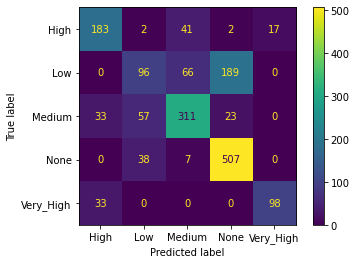

In [45]:
from sklearn.model_selection import train_test_split

X= training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data['AVERAGE_SPEED_DIFF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21127)

from sklearn.svm import SVC
model = SVC(random_state=2027)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))


'''
Grid
'''
C_range = np.logspace(1, 6, 15)
gamma_range = np.logspace(-4, 0, 15)
param_grid = dict(gamma=gamma_range, C=C_range, kernel=['rbf'])

'''
Train model
'''
from sklearn.model_selection import GridSearchCV
#n_jobs é o numero de threads do cpu
grid = GridSearchCV(SVC(random_state=2027),param_grid, cv=20, refit=True, n_jobs=24, verbose=3)

grid.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)

In [46]:
'''
Model Evaluation
'''
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))




grid.best_params_

              precision    recall  f1-score   support

        High       0.76      0.76      0.76       245
         Low       0.68      0.64      0.66       351
      Medium       0.80      0.77      0.78       424
        None       0.85      0.91      0.88       552
   Very_High       0.83      0.82      0.83       131

    accuracy                           0.79      1703
   macro avg       0.78      0.78      0.78      1703
weighted avg       0.79      0.79      0.79      1703



{'C': 37275.93720314938, 'gamma': 0.0013894954943731374, 'kernel': 'rbf'}

In [ ]:
grid_predictions = grid.predict(test_data)
#print(classification_report(test_data,grid_predictions))

In [ ]:
grid_predictions

In [ ]:
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)


#transposing
df = numpy_data.transpose()
df_t = df.T
# print dataframe columns

df_t = df_t.set_axis(["Speed_Diff"], axis=1)
df_t.index = df_t.index+1
#df_t = df_t.rename(columns={"RowId":"Speed_Diff"})

df_t
df_t.to_csv("submission8_grid.csv", index_label='RowId')